# GradBoost Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [4]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_pro_normalized, y_teams_pro, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [17]:
# next is 1 min / met parameters meer dan 17 min / now is 6 min

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [19]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 5 min

In [20]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7859170925610449

In [21]:
y_pred = gbr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7923349893541519


In [24]:
gbr.score(X_test, y_test)

0.7923349893541519

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79      3469
        True       0.80      0.79      0.79      3576

    accuracy                           0.79      7045
   macro avg       0.79      0.79      0.79      7045
weighted avg       0.79      0.79      0.79      7045



In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7923349893541519
recall 0.7916666666666666
precision 0.7976894899971823
f1 0.7946666666666666


### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_pred))

[[2751  718]
 [ 745 2831]]


[[2751  718]
 [ 745 2831]]
0.7923349893541519


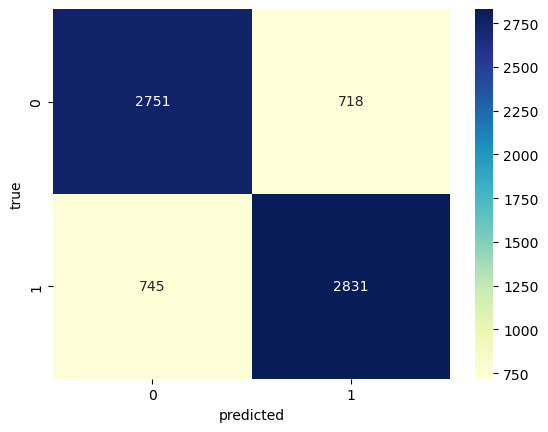

In [31]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.74343354 0.0117288  0.46320685 0.76057639 0.08792364 0.97338649
 0.8691888  0.86187472 0.87081811 0.0848869  0.13766701 0.31679557
 0.04294358 0.75122682 0.05055542 0.60752193 0.88110613 0.78380119
 0.92484716 0.02591984 0.34610878 0.93158355 0.54605356 0.75002566
 0.89331025 0.09505138 0.23631508 0.05498974 0.14758689 0.02810678
 0.51890915 0.95269467 0.43924611 0.51952586 0.95929907 0.75799097
 0.48007417 0.73259069 0.11472235 0.05214121 0.03558131 0.80990379
 0.22618206 0.0216953  0.69611159 0.96560763 0.94733045 0.38523753
 0.70695451 0.26864174 0.54221225 0.97049173 0.32563082 0.59003477
 0.28352021 0.92471501 0.52540692 0.95849671 0.72453236 0.10424
 0.02019909 0.94421389 0.08672961 0.93794605 0.78445797 0.79560259
 0.82282067 0.03729947 0.71834173 0.11447909 0.93751265 0.49117921
 0.43654805 0.41167567 0.06896178 0.68355659 0.62161883 0.74919543
 0.21782622 0.68521701 0.2205124  0.15144894 0.51195895 0.45053621
 0.32906276 0.73825348 0.23760207 0.07649515 0.30500928 0.2253308

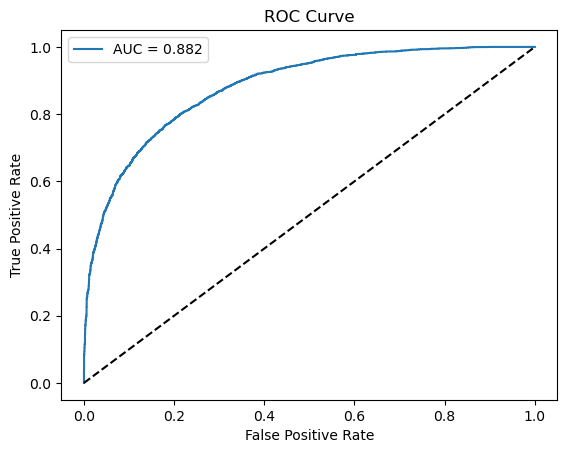

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [33]:
features = pd.DataFrame(gbr.feature_importances_, index = X_train.columns)

In [34]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.370687
avg_positioning_percent_infront_ball,0.275769
avg_positioning_time_front_of_ball,0.014751
avg_positioning_avg_distance_to_ball_possession,0.011568
avg_positioning_avg_distance_to_ball_no_possession,0.010882
...,...
min_positioning_time_behind_ball,0.000185
movement_avg_speed_percentage_3,0.000173
movement_avg_speed_1,0.000169
positioning_percent_offensive_half_3,0.000166


# Model 2 -------------------------------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [37]:
# next is 1 min / now depth=7 is 16 min / depth=9 21 min / 14 min

In [38]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [39]:
# next is 2 min / 11 min

In [40]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7848760174143479

In [41]:
y_pred2 = gbr2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.78708303761533


In [44]:
gbr2.score(X_test, y_test)

0.78708303761533

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.78      0.79      0.78      3469
        True       0.79      0.79      0.79      3576

    accuracy                           0.79      7045
   macro avg       0.79      0.79      0.79      7045
weighted avg       0.79      0.79      0.79      7045



In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.78708303761533
recall 0.7860738255033557
precision 0.7927241962774958
f1 0.7893850042122998


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test, y_pred2))

[[2734  735]
 [ 765 2811]]


[[2734  735]
 [ 765 2811]]
0.78708303761533


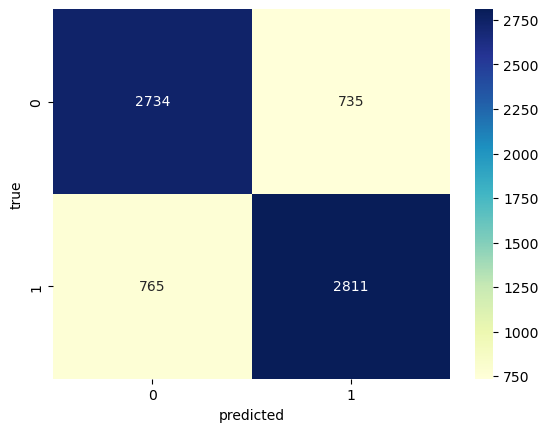

In [51]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[8.98428880e-01 6.16299281e-04 2.73736778e-01 8.74284518e-01
 2.22625530e-02 9.93011134e-01 9.69049096e-01 9.86051014e-01
 9.82016553e-01 1.42783654e-02 1.45148628e-01 2.04575239e-01
 7.89771723e-03 9.61987979e-01 4.14111475e-03 6.03422015e-01
 9.66012881e-01 7.94941822e-01 9.83227818e-01 2.66885010e-03
 7.54291952e-01 9.83122792e-01 3.59646987e-01 8.82548436e-01
 9.67882318e-01 2.07614770e-02 1.08521044e-01 4.28778076e-03
 3.83316720e-02 2.62073704e-03 3.85070860e-01 9.85083496e-01
 8.08672133e-01 4.88321548e-01 9.93133690e-01 9.30093603e-01
 7.09393663e-01 8.02835867e-01 5.05557887e-02 1.96771834e-02
 5.55846463e-03 9.80988242e-01 3.23361693e-01 7.21002994e-03
 9.58355110e-01 9.95838565e-01 9.88840187e-01 4.45712811e-01
 7.93997457e-01 1.33788085e-01 3.83795781e-01 9.96324422e-01
 3.08954422e-01 6.83081718e-01 3.18074379e-01 9.72791208e-01
 4.35837351e-01 9.94658096e-01 8.32811061e-01 9.02731085e-02
 3.64403424e-03 9.93797016e-01 3.21384681e-02 9.91305379e-01
 9.75425754e-01 7.618006

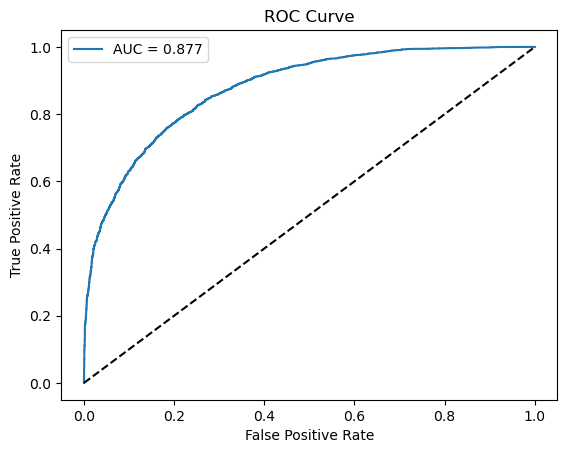

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [53]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_train.columns)

In [54]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.216214
avg_positioning_percent_behind_ball,0.203982
avg_positioning_avg_distance_to_ball_no_possession,0.010971
positioning_time_defensive_half_1,0.010844
avg_positioning_avg_distance_to_ball_possession,0.010750
...,...
positioning_percent_defensive_half_3,0.000858
movement_avg_speed_1,0.000832
movement_avg_speed_percentage_2,0.000826
movement_avg_speed_3,0.000703
